# Visual and Data Analysis - FIFA 19 Players
- **Created by Andrés Segura Tinoco**
- **Created on May 1, 2019**

# 4. Clustering Data
## Loading main libraries and data

In [1]:
# Load the Pandas libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load scikit-learn library for K-Means
from sklearn.cluster import KMeans

In [4]:
# Load Interact libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [5]:
# Read FIFA 19 players data only using the current skill values
dataURL = "https://raw.githubusercontent.com/ansegura7/DataScience_FIFA19Data/master/data/fifa19_overall_data.csv"
data = pd.read_csv(dataURL)

In [6]:
# Function that obtains the numerical data from the data frame
def getNumericalData(data, quality):
    numData = pd.DataFrame()
    
    # Create DataFrame
    for col in data.columns:
        if (str(data[col].dtype) != "object"):
            numData[col] = data[col]
    
    # Remove columns that are not relevant for the analysis
    nonColumns = ["Order", "ID", "Overall", "Potential", "Value €", "Wage €", "Release Clause €"]
    numData = numData.drop(nonColumns, axis=1)
    
    # Data Quality process
    if(quality and len(numData.columns) > 0):
        numData = numData.fillna(numData.mean())
    
    print(numData.shape)
    return numData;

In [7]:
# Filter/Delete player with an overall below 70
threshold = 70
data = data.loc[data["Overall"] >= threshold]
len(data)

5638

In [8]:
numData = getNumericalData(data, True)
numData.head()

(5638, 68)


,Age,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,HeightMts,WeightLbs,LS,ST,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,2202,5.0,4.0,4.0,10.0,1.70,159.0,88,88,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,2228,5.0,4.0,5.0,7.0,1.88,183.0,91,91,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,2143,5.0,5.0,5.0,10.0,1.75,150.0,84,84,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,1471,4.0,3.0,1.0,1.0,1.93,168.0,0,0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,2281,4.0,5.0,4.0,7.0,1.80,154.0,82,82,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


## Apply PCA

In [9]:
# Function that apply Principal Component Analysis
def applyPCA(data):
    
    # Standardize the Data
    x = StandardScaler().fit_transform(data.values)
    
    # Create a DataFrame from PCA
    pca = PCA(n_components = 2)
    pcaData = pca.fit_transform(x)
    pcaDF = pd.DataFrame(data = pcaData, columns = ["PC1", "PC2"])
    
    # Show the total explained variance ratio of model
    print(sum(pca.explained_variance_ratio_) * 100)
    
    return pcaDF;

In [10]:
pcaDF = applyPCA(numData)
pcaDF.head()

76.48218170323433


,PC1,PC2
0,-8.278730,-6.858504
1,-7.785551,-4.799394
2,-7.621285,-6.761262
3,18.290233,-2.583135
4,-8.889818,-2.510513


## Clustering: K-Means

In [11]:
# Getting the values and plotting it
x = pcaDF['PC1'].values
y = pcaDF['PC2'].values
train = np.array(list(zip(x, y)))

In [12]:
# Calculates the K-Means for (x, y) dataset
def runKMeans(k_clusters):
    kmeans = KMeans(n_clusters = k_clusters, algorithm = "elkan")
    kmeans = kmeans.fit(train)

    # Getting the cluster labels
    clusters = kmeans.predict(train)
    
    # Centroid values
    centroids = kmeans.cluster_centers_
    
    # Plotting K-Means result
    plotKMeansData(train, k_clusters, centroids, clusters)

In [13]:
# Create scatter plot with K-Means data
def plotKMeansData(data, k_clusters, centroids, clusters):
    fig, ax = plt.subplots(figsize = (14, 14))
    
    # Plotting vars
    colors = ["r", "g", "b", "y", "c", "m", "k"]
    nData = len(data)

    # Create scatter plot
    for i in range(k_clusters):
        points = np.array([data[j] for j in range(nData) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s = 10, c = colors[i], cmap = "viridis")
    ax.scatter(centroids[:, 0], centroids[:, 1], marker="o", s = 100, c = "#050505")

    # Plot setup
    ax.set_xlabel("PC 1", fontsize = 12)
    ax.set_ylabel("PC 2", fontsize = 12)
    ax.set_title("Players by Position", fontsize = 20)
    ax.legend(["K-Means: Players with overall >= 70"])
    ax.grid()

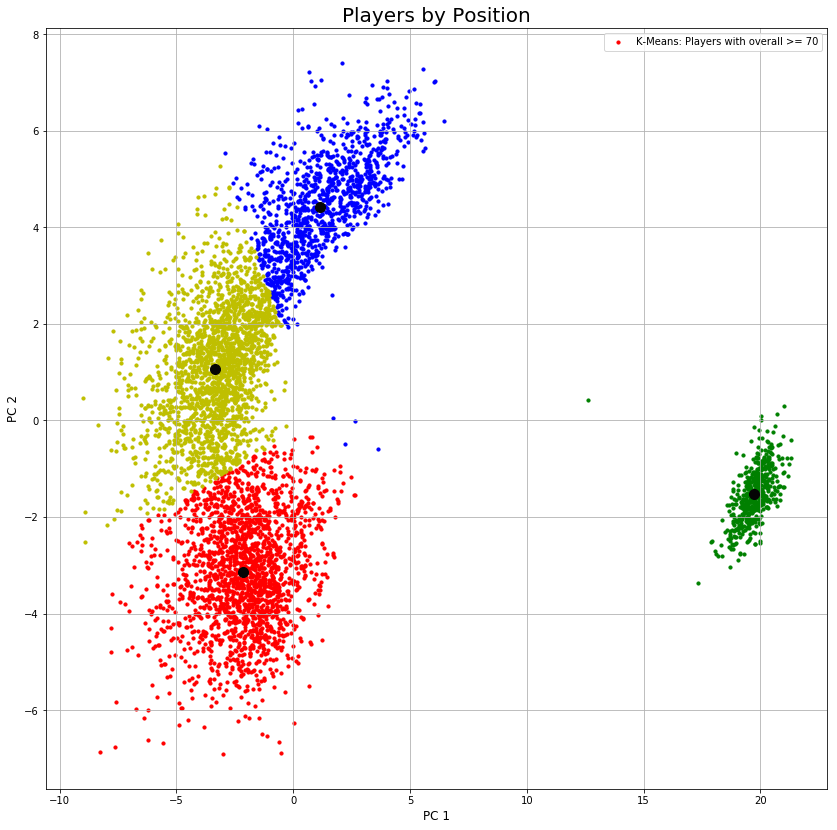

In [14]:
# Create interactive control to control k value
interactive(runKMeans, k_clusters = widgets.IntSlider(min = 1, max = 7, step = 1, value = 4))
# runKMeans(k_clusters = 4)

---
<a href="https://github.com/ansegura7/DataScience_FIFA19Data">&laquo; GitHub Repository</a>